# Deep Neural Network
## data 준비

In [2]:
import torch

device = 'cuda:0' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
torch.manual_seed(777)
device

'cuda:0'

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import os

path = "../../../"

training_data = datasets.FashionMNIST(
    root=path,
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root=path,
    train=False,
    download=True,
    transform=ToTensor()
)

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## model 준비, 학습

In [4]:
import torch.nn as nn

linear1 = nn.Linear(28*28, 100)
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(100, 10)
softmax = nn.Softmax()
model = nn.Sequential(linear1, sigmoid, linear2, softmax).to(device)

model

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=10, bias=True)
  (3): Softmax(dim=None)
)

In [5]:
from torch import optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [6]:
def train(epoch):
    cnt = 0
    for cnt in range(epoch):
        model.train()
        correct = 0
        for data, targets in train_dataloader:
            data = data.reshape(-1, 28*28).to(device)
            targets = targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            predicted = torch.argmax(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()
        data_num = len(train_dataloader.dataset)
        cnt += 1
        print("Acurracy in epoch {} : {}/{} ({:.0f}%)".format(cnt, correct, data_num, 100*correct/data_num))

train(5)

c:\Users\민재\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Acurracy in epoch 1 : 46193/60000 (77%)
Acurracy in epoch 2 : 48363/60000 (81%)
Acurracy in epoch 3 : 48622/60000 (81%)
Acurracy in epoch 4 : 48703/60000 (81%)
Acurracy in epoch 5 : 48763/60000 (81%)


### ReLU 함수 사용
Relu로 하니까 너무 성능이 떨어져서 LeakyReLU로 바꿈.

In [7]:
model = nn.Sequential(
    nn.Linear(28*28, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 10),
    nn.Softmax()
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

train(5)

Acurracy in epoch 1 : 44054/60000 (73%)
Acurracy in epoch 2 : 45663/60000 (76%)
Acurracy in epoch 3 : 46348/60000 (77%)
Acurracy in epoch 4 : 47899/60000 (80%)
Acurracy in epoch 5 : 48126/60000 (80%)


In [8]:
def test():
    model.eval()
    correct = 0
    
    with torch.no_grad():
        for data, targets in test_dataloader:
            data = data.to(device).view(-1, 28*28)
            targets = targets.to(device)
            outputs = model(data)
            
            # _, predicted = torch.max(outputs.data, 1)
            predicted = torch.argmax(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()
            
        data_num = len(test_dataloader.dataset)
        print("Acuraccy in test : {}/{} ({:.0f}%)".format(correct, data_num, 100*correct/data_num))
        
test()

Acuraccy in test : 7830/10000 (78%)


predict is	: Bag
answer is	: Bag


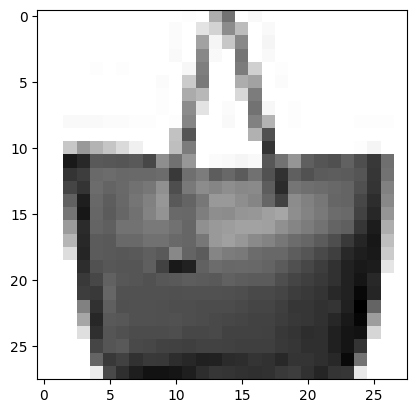

In [11]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

import matplotlib.pyplot as plt
import random as r
index = r.randint(0, len(test_data))

model.eval()

data, target = test_dataloader.dataset[index]
data = data.to(device).reshape(28*28)
output = model(data)
predicted = torch.argmax(output.data, 0)
print("predict is\t:", labels_map[predicted.item()])

data_show = data.cpu().numpy()
plt.imshow(data_show.reshape(28, 28), cmap = 'gray_r')
print("answer is\t:", labels_map[target])